# Podstawowa Analiza Danych Supermarketu

Ten notebook zawiera podstawową analizę wygenerowanych danych syntetycznych dla systemu planowania personelu supermarketu.

## Cel analizy
- Zrozumienie wzorców ruchu klientów
- Analiza efektywności planowania personelu
- Identyfikacja czynników wpływających na sprzedaż
- Przygotowanie danych do modelowania ML


In [21]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Ustawienia wyświetlania
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Biblioteki załadowane pomyślnie!")


✅ Biblioteki załadowane pomyślnie!


In [22]:
# Wczytanie danych
df = pd.read_csv('../data/raw/store_data.csv')

print("=== INFORMACJE O DANYCH ===")
print(f"Kształt danych: {df.shape}")
print(f"Okres danych: {df['date'].min()} do {df['date'].max()}")
print(f"Liczba unikalnych dni: {df['date'].nunique()}")

# Podstawowe informacje o DataFrame
print("\n=== STRUKTURA DANYCH ===")
print(df.info())

# Pierwsze 5 wierszy
print("\n=== PIERWSZE 5 WIERSZY ===")
df.head()


=== INFORMACJE O DANYCH ===
Kształt danych: (6222, 11)
Okres danych: 2024-01-01 do 2024-12-31
Liczba unikalnych dni: 366

=== STRUKTURA DANYCH ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 6222 non-null   object 
 1   day_of_week          6222 non-null   object 
 2   hour                 6222 non-null   int64  
 3   customers_per_hour   6222 non-null   int64  
 4   staff_working        6222 non-null   int64  
 5   sales_pln            6222 non-null   float64
 6   is_weekend           6222 non-null   bool   
 7   is_holiday           6222 non-null   bool   
 8   weather              6222 non-null   object 
 9   month                6222 non-null   int64  
 10  seasonal_multiplier  6222 non-null   float64
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 449.8+ KB
None

=== PIERWSZE 5 WI

,date,day_of_week,hour,customers_per_hour,staff_working,sales_pln,is_weekend,is_holiday,weather,month,seasonal_multiplier
0,2024-01-01,Poniedziałek,7,32,8,2812.34,False,True,deszcz,1,1.3
1,2024-01-01,Poniedziałek,8,17,4,1626.95,False,True,słonecznie,1,1.3
2,2024-01-01,Poniedziałek,9,58,6,5995.64,False,True,słonecznie,1,1.3
3,2024-01-01,Poniedziałek,10,41,6,3332.05,False,True,słonecznie,1,1.3
4,2024-01-01,Poniedziałek,11,47,8,2704.05,False,True,pochmurnie,1,1.3


In [23]:
# Podstawowe statystyki opisowe
print("=== STATYSTYKI OPISOWE ===")
print(df.describe())

print("\n=== STATYSTYKI KATEGORYCZNE ===")
print("Rozkład dni tygodnia:")
print(df['day_of_week'].value_counts())

print("\nRozkład pogody:")
print(df['weather'].value_counts())

print("\nRozkład liczby personelu:")
print(df['staff_working'].value_counts().sort_index())


=== STATYSTYKI OPISOWE ===
              hour  customers_per_hour  staff_working     sales_pln  \
count  6222.000000         6222.000000    6222.000000   6222.000000   
mean     15.000000           97.757313       9.348602  10586.751086   
std       4.899373           50.221963       3.147473   6951.563387   
min       7.000000           10.000000       3.000000    806.470000   
25%      11.000000           60.000000       6.000000   5776.992500   
50%      15.000000           90.000000       8.000000   8937.840000   
75%      19.000000          126.000000      12.000000  13437.955000   
max      23.000000          422.000000      17.000000  91271.260000   

             month  seasonal_multiplier  
count  6222.000000          6222.000000  
mean      6.513661             1.060109  
std       3.451511             0.128713  
min       1.000000             0.900000  
25%       4.000000             1.000000  
50%       7.000000             1.000000  
75%      10.000000             1.150000

## Analiza Wizualna - 5 Kluczowych Wykresów


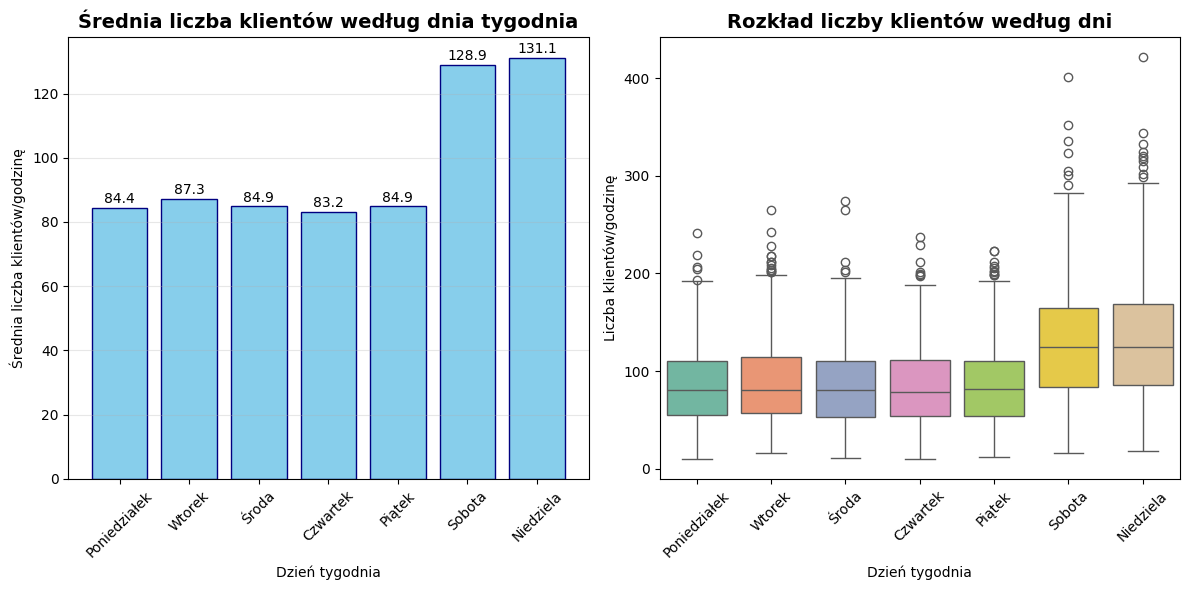

📊 Wykres 1: Analiza ruchu według dni tygodnia


In [24]:
# WYKRES 1: Klienci vs dzień tygodnia
plt.figure(figsize=(12, 6))

# Kolejność dni tygodnia
day_order = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']

# Średnia liczba klientów według dnia tygodnia
daily_customers = df.groupby('day_of_week')['customers_per_hour'].mean().reindex(day_order)

plt.subplot(1, 2, 1)
bars = plt.bar(daily_customers.index, daily_customers.values, color='skyblue', edgecolor='navy')
plt.title('Średnia liczba klientów według dnia tygodnia', fontsize=14, fontweight='bold')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Średnia liczba klientów/godzinę')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Dodanie wartości na słupkach
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

# Boxplot dla lepszego zrozumienia rozkładu
plt.subplot(1, 2, 2)
df_ordered = df.copy()
df_ordered['day_of_week'] = pd.Categorical(df_ordered['day_of_week'], categories=day_order, ordered=True)
sns.boxplot(data=df_ordered, x='day_of_week', y='customers_per_hour', palette='Set2')
plt.title('Rozkład liczby klientów według dni', fontsize=14, fontweight='bold')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba klientów/godzinę')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("📊 Wykres 1: Analiza ruchu według dni tygodnia")


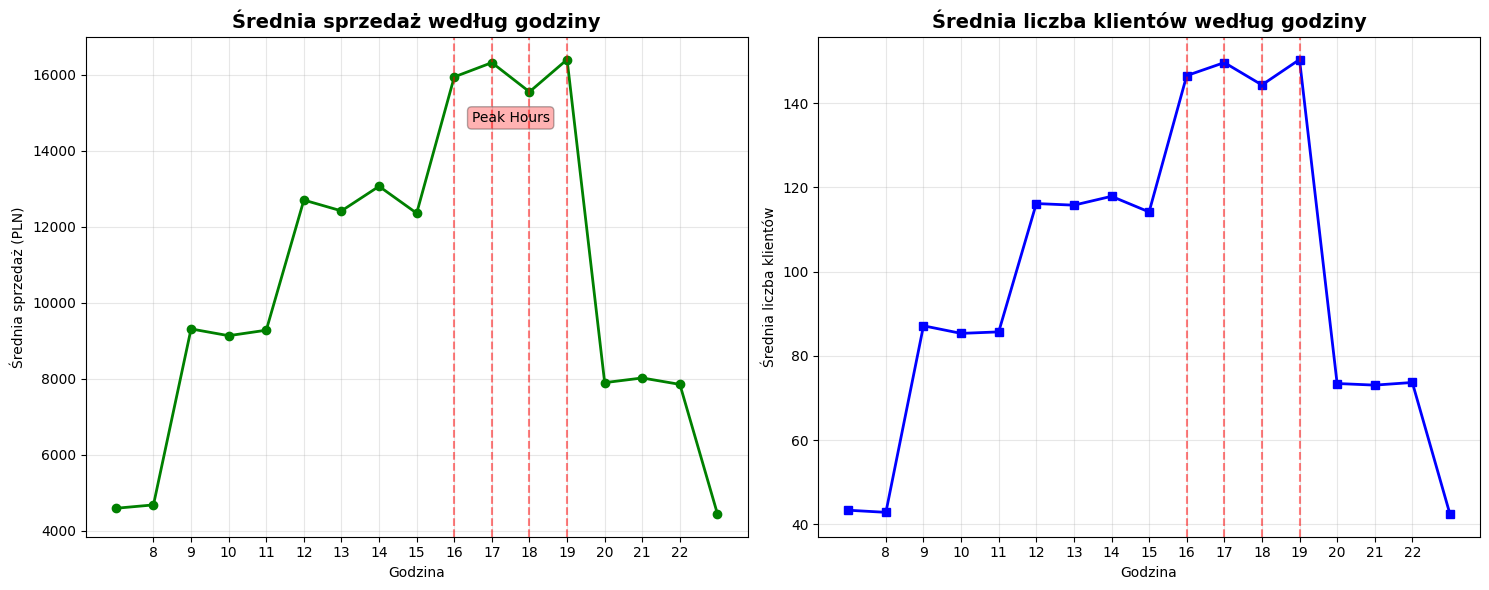

📊 Wykres 2: Analiza sprzedaży i ruchu według godzin


In [25]:
# WYKRES 2: Sprzedaż vs godzina
plt.figure(figsize=(15, 6))

# Średnia sprzedaż według godziny
hourly_sales = df.groupby('hour')['sales_pln'].mean()
hourly_customers = df.groupby('hour')['customers_per_hour'].mean()

plt.subplot(1, 2, 1)
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linewidth=2, markersize=6, color='green')
plt.title('Średnia sprzedaż według godziny', fontsize=14, fontweight='bold')
plt.xlabel('Godzina')
plt.ylabel('Średnia sprzedaż (PLN)')
plt.grid(True, alpha=0.3)
plt.xticks(range(8, 23))

# Peak hours highlighting
peak_hours = [16, 17, 18, 19]
for hour in peak_hours:
    plt.axvline(x=hour, color='red', linestyle='--', alpha=0.5)
plt.text(17.5, max(hourly_sales.values)*0.9, 'Peak Hours', ha='center', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.3))

plt.subplot(1, 2, 2)
plt.plot(hourly_customers.index, hourly_customers.values, marker='s', linewidth=2, markersize=6, color='blue')
plt.title('Średnia liczba klientów według godziny', fontsize=14, fontweight='bold')
plt.xlabel('Godzina')
plt.ylabel('Średnia liczba klientów')
plt.grid(True, alpha=0.3)
plt.xticks(range(8, 23))

# Peak hours highlighting
for hour in peak_hours:
    plt.axvline(x=hour, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("📊 Wykres 2: Analiza sprzedaży i ruchu według godzin")


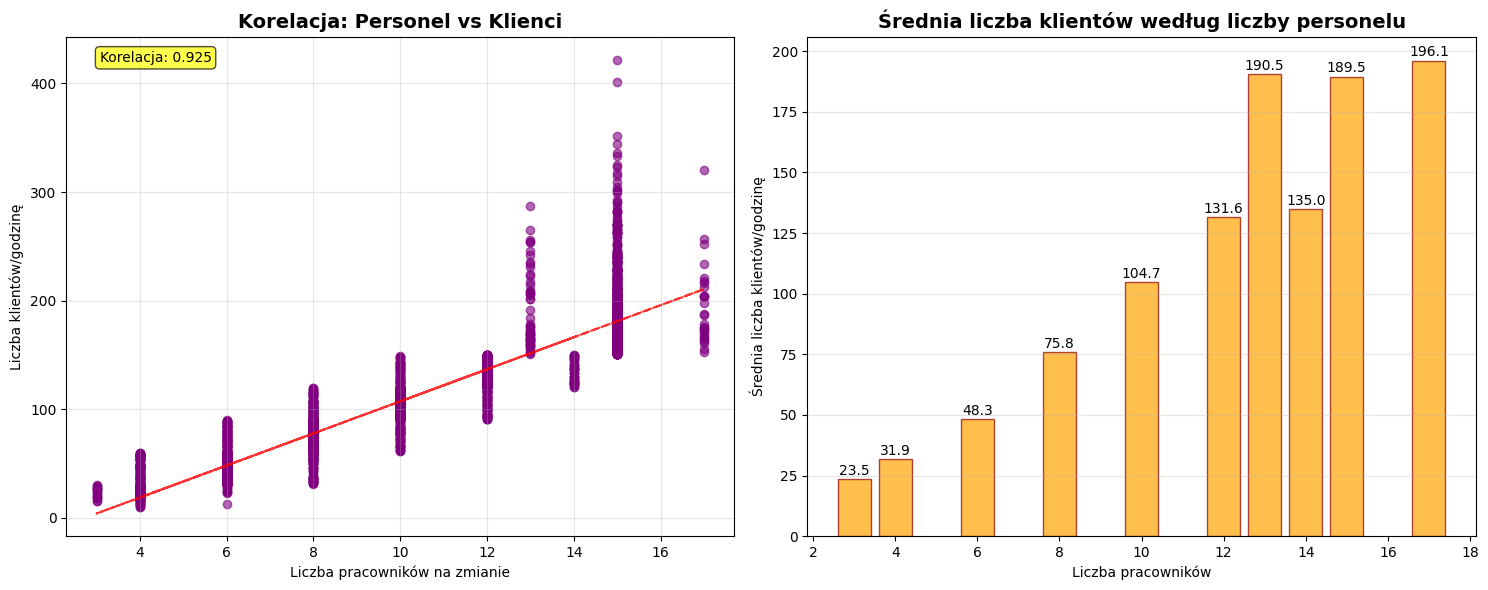

📊 Wykres 3: Analiza efektywności personelu
Korelacja personel-klienci: 0.925


In [26]:
# WYKRES 3: Korelacja personel vs klienci
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Scatter plot z linią trendu
plt.scatter(df['staff_working'], df['customers_per_hour'], alpha=0.6, color='purple')
z = np.polyfit(df['staff_working'], df['customers_per_hour'], 1)
p = np.poly1d(z)
plt.plot(df['staff_working'].unique(), p(df['staff_working'].unique()), "r--", alpha=0.8)

plt.title('Korelacja: Personel vs Klienci', fontsize=14, fontweight='bold')
plt.xlabel('Liczba pracowników na zmianie')
plt.ylabel('Liczba klientów/godzinę')
plt.grid(True, alpha=0.3)

# Obliczenie korelacji
correlation = df['staff_working'].corr(df['customers_per_hour'])
plt.text(0.05, 0.95, f'Korelacja: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

plt.subplot(1, 2, 2)
# Średnia liczba klientów według liczby personelu
staff_efficiency = df.groupby('staff_working').agg({
    'customers_per_hour': 'mean',
    'sales_pln': 'mean'
}).round(1)

bars = plt.bar(staff_efficiency.index, staff_efficiency['customers_per_hour'], 
               color='orange', edgecolor='darkred', alpha=0.7)
plt.title('Średnia liczba klientów według liczby personelu', fontsize=14, fontweight='bold')
plt.xlabel('Liczba pracowników')
plt.ylabel('Średnia liczba klientów/godzinę')
plt.grid(axis='y', alpha=0.3)

# Dodanie wartości na słupkach
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("📊 Wykres 3: Analiza efektywności personelu")
print(f"Korelacja personel-klienci: {correlation:.3f}")


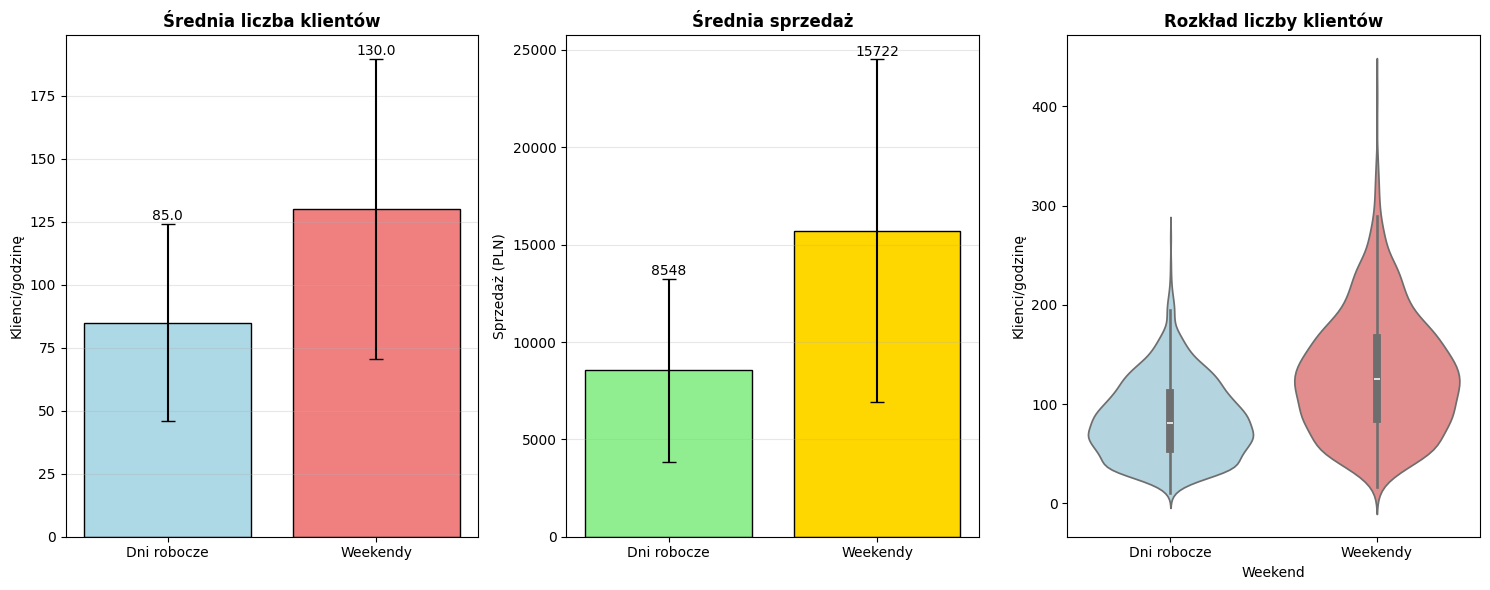

📊 Wykres 4: Porównanie weekendów z dniami roboczymi
Wzrost klientów w weekendy: 53.0%
Wzrost sprzedaży w weekendy: 83.9%


In [27]:
# WYKRES 4: Weekendy vs dni robocze
plt.figure(figsize=(15, 6))

# Porównanie weekendów z dniami roboczymi
weekend_comparison = df.groupby('is_weekend').agg({
    'customers_per_hour': ['mean', 'std'],
    'sales_pln': ['mean', 'std'],
    'staff_working': 'mean'
}).round(2)

plt.subplot(1, 3, 1)
categories = ['Dni robocze', 'Weekendy']
customers_means = [weekend_comparison.loc[False, ('customers_per_hour', 'mean')],
                   weekend_comparison.loc[True, ('customers_per_hour', 'mean')]]
customers_stds = [weekend_comparison.loc[False, ('customers_per_hour', 'std')],
                  weekend_comparison.loc[True, ('customers_per_hour', 'std')]]

bars = plt.bar(categories, customers_means, yerr=customers_stds, 
               color=['lightblue', 'lightcoral'], capsize=5, edgecolor='black')
plt.title('Średnia liczba klientów', fontsize=12, fontweight='bold')
plt.ylabel('Klienci/godzinę')
plt.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + customers_stds[i] + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

plt.subplot(1, 3, 2)
sales_means = [weekend_comparison.loc[False, ('sales_pln', 'mean')],
               weekend_comparison.loc[True, ('sales_pln', 'mean')]]
sales_stds = [weekend_comparison.loc[False, ('sales_pln', 'std')],
              weekend_comparison.loc[True, ('sales_pln', 'std')]]

bars = plt.bar(categories, sales_means, yerr=sales_stds,
               color=['lightgreen', 'gold'], capsize=5, edgecolor='black')
plt.title('Średnia sprzedaż', fontsize=12, fontweight='bold')
plt.ylabel('Sprzedaż (PLN)')
plt.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + sales_stds[i] + 20,
             f'{height:.0f}', ha='center', va='bottom')

plt.subplot(1, 3, 3)
# Violin plot pokazujący rozkład
sns.violinplot(data=df, x='is_weekend', y='customers_per_hour', palette=['lightblue', 'lightcoral'])
plt.title('Rozkład liczby klientów', fontsize=12, fontweight='bold')
plt.xlabel('Weekend')
plt.ylabel('Klienci/godzinę')
plt.xticks([0, 1], ['Dni robocze', 'Weekendy'])

plt.tight_layout()
plt.show()

# Obliczenie wzrostu procentowego
weekend_boost = ((customers_means[1] / customers_means[0]) - 1) * 100
sales_boost = ((sales_means[1] / sales_means[0]) - 1) * 100

print("📊 Wykres 4: Porównanie weekendów z dniami roboczymi")
print(f"Wzrost klientów w weekendy: {weekend_boost:.1f}%")
print(f"Wzrost sprzedaży w weekendy: {sales_boost:.1f}%")


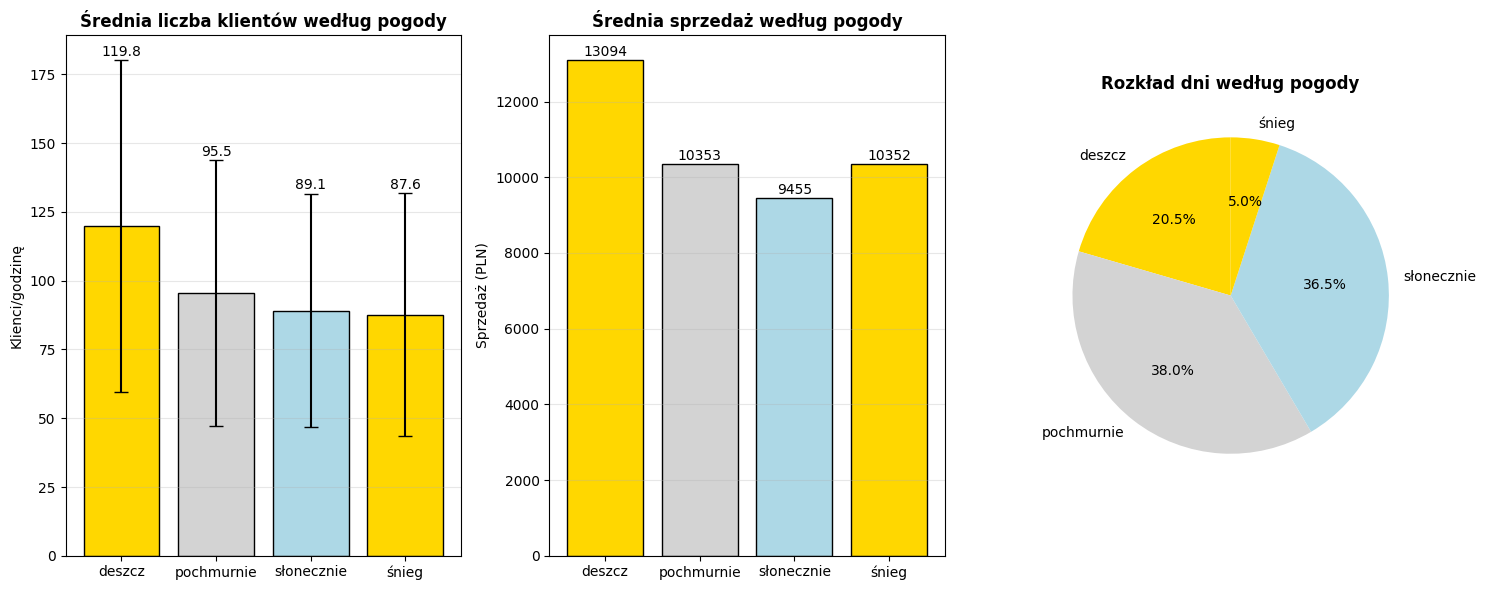

📊 Wykres 5: Analiza wpływu pogody na ruch
Rozkład pogody w danych:
  deszcz: 1275 dni (20.5%)
  pochmurnie: 2364 dni (38.0%)
  słonecznie: 2272 dni (36.5%)
  śnieg: 311 dni (5.0%)


In [28]:
# WYKRES 5: Wpływ pogody na ruch
plt.figure(figsize=(15, 6))

weather_analysis = df.groupby('weather').agg({
    'customers_per_hour': ['mean', 'std', 'count'],
    'sales_pln': 'mean'
}).round(2)

plt.subplot(1, 3, 1)
weather_customers = weather_analysis[('customers_per_hour', 'mean')]
weather_std = weather_analysis[('customers_per_hour', 'std')]

bars = plt.bar(weather_customers.index, weather_customers.values, 
               yerr=weather_std.values, capsize=5,
               color=['gold', 'lightgray', 'lightblue'], edgecolor='black')
plt.title('Średnia liczba klientów według pogody', fontsize=12, fontweight='bold')
plt.ylabel('Klienci/godzinę')
plt.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + weather_std.iloc[i] + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

plt.subplot(1, 3, 2)
weather_sales = weather_analysis[('sales_pln', 'mean')]
bars = plt.bar(weather_sales.index, weather_sales.values,
               color=['gold', 'lightgray', 'lightblue'], edgecolor='black')
plt.title('Średnia sprzedaż według pogody', fontsize=12, fontweight='bold')
plt.ylabel('Sprzedaż (PLN)')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height:.0f}', ha='center', va='bottom')

plt.subplot(1, 3, 3)
# Pie chart rozkładu pogody
weather_counts = weather_analysis[('customers_per_hour', 'count')]
colors = ['gold', 'lightgray', 'lightblue']
plt.pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Rozkład dni według pogody', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Wykres 5: Analiza wpływu pogody na ruch")
print("Rozkład pogody w danych:")
for weather, count in weather_counts.items():
    percentage = (count / weather_counts.sum()) * 100
    print(f"  {weather}: {count} dni ({percentage:.1f}%)")


## Podsumowanie Analizy

### Kluczowe Wnioski:

1. **Wzorce tygodniowe**: Weekendy pokazują znacząco wyższy ruch klientów
2. **Godziny szczytu**: Największy ruch między 16:00-19:00
3. **Korelacja personel-klienci**: Pozytywna korelacja między liczbą pracowników a klientami
4. **Wpływ weekendów**: Wyraźny wzrost ruchu i sprzedaży w weekendy
5. **Wpływ pogody**: Deszczowe dni generują więcej ruchu (efekt "schronienia")


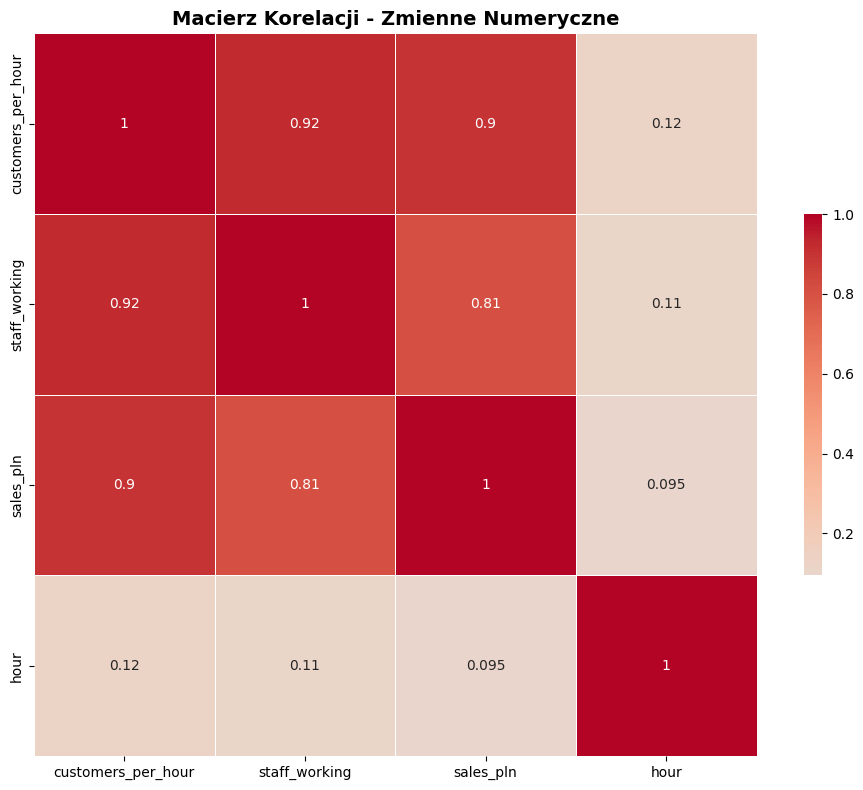

📊 Macierz korelacji pokazuje związki między zmiennymi numerycznymi

Najważniejsze korelacje:
  customers_per_hour ↔ staff_working: 0.925
  customers_per_hour ↔ sales_pln: 0.902
  staff_working ↔ sales_pln: 0.811


In [29]:
# Macierz korelacji dla wszystkich zmiennych numerycznych
plt.figure(figsize=(10, 8))

# Wybór zmiennych numerycznych
numeric_cols = ['customers_per_hour', 'staff_working', 'sales_pln', 'hour']
correlation_matrix = df[numeric_cols].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Macierz Korelacji - Zmienne Numeryczne', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Macierz korelacji pokazuje związki między zmiennymi numerycznymi")
print("\nNajważniejsze korelacje:")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Pokazuj tylko znaczące korelacje
            print(f"  {numeric_cols[i]} ↔ {numeric_cols[j]}: {corr_val:.3f}")


In [30]:
# Podsumowanie końcowe
print("="*60)
print("🎯 PODSUMOWANIE ANALIZY DANYCH")
print("="*60)

print(f"📊 Przeanalizowano {len(df):,} rekordów z okresu {df['date'].min()} - {df['date'].max()}")
print(f"💰 Łączna sprzedaż: {df['sales_pln'].sum():,.2f} PLN")
print(f"👥 Średnia liczba klientów: {df['customers_per_hour'].mean():.1f}/godzinę")
print(f"👨‍💼 Średnia liczba personelu: {df['staff_working'].mean():.1f} pracowników/zmianę")

print("\n🔍 KLUCZOWE WZORCE:")
print("• Weekendy: +{:.1f}% więcej klientów niż dni robocze".format(
    ((df[df['is_weekend']==True]['customers_per_hour'].mean() / 
      df[df['is_weekend']==False]['customers_per_hour'].mean()) - 1) * 100))

print("• Peak hours (16-19): Najwyższy ruch i sprzedaż")

print("• Deszczowe dni: +{:.1f}% więcej klientów".format(
    ((df[df['weather']=='deszcz']['customers_per_hour'].mean() / 
      df[df['weather']!='deszcz']['customers_per_hour'].mean()) - 1) * 100))

print("• Korelacja personel-klienci: {:.3f} (pozytywna)".format(
    df['staff_working'].corr(df['customers_per_hour'])))

print("\n✅ Dane są gotowe do dalszej analizy i modelowania ML!")
print("="*60)


🎯 PODSUMOWANIE ANALIZY DANYCH
📊 Przeanalizowano 6,222 rekordów z okresu 2024-01-01 - 2024-12-31
💰 Łączna sprzedaż: 65,870,765.26 PLN
👥 Średnia liczba klientów: 97.8/godzinę
👨‍💼 Średnia liczba personelu: 9.3 pracowników/zmianę

🔍 KLUCZOWE WZORCE:
• Weekendy: +53.0% więcej klientów niż dni robocze
• Peak hours (16-19): Najwyższy ruch i sprzedaż
• Deszczowe dni: +30.1% więcej klientów
• Korelacja personel-klienci: 0.925 (pozytywna)

✅ Dane są gotowe do dalszej analizy i modelowania ML!
